In [1]:
import pandas as pd

In [2]:
# show all columns
pd.set_option('display.max_columns', None)

In [3]:
import pandas as pd
from pathlib import Path

raw_root = Path("data/raw")  # adjust
for b in ["bank_s","bank_m","bank_l"]:
    acc = pd.read_csv(raw_root/b/"accounts.csv")
    sar = pd.read_csv(raw_root/b/"sar_accounts.csv")
    sar_yes = sar[sar["IS_SAR"]=="YES"]["ACCOUNT_ID"].nunique()
    print(b, "accounts=", acc["acct_id"].nunique(), "sar_yes=", sar_yes, "rate=", sar_yes/acc["acct_id"].nunique())


bank_s accounts= 1800 sar_yes= 125 rate= 0.06944444444444445
bank_m accounts= 3613 sar_yes= 174 rate= 0.04815942430113479
bank_l accounts= 6630 sar_yes= 378 rate= 0.05701357466063348


In [4]:
# All code/comments in English.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data from your log
df = pd.DataFrame(
    {
        "bank": ["bank_s", "bank_m", "bank_l"],
        "accounts": [1800, 3613, 6630],
        "sar_yes": [125, 174, 378],
        "tx_total": [22118, 50701, 142029],
        "tx_internal": [84, 3012, 76782],
        "tx_cross": [22034, 47689, 65247],
    }
)

# Derived metrics
df["sar_rate"] = df["sar_yes"] / df["accounts"]
df["tx_per_acct"] = df["tx_total"] / df["accounts"]
df["cross_ratio"] = df["tx_cross"] / df["tx_total"]

print(df[["bank", "accounts", "sar_yes", "sar_rate", "tx_total", "tx_internal", "tx_cross", "cross_ratio", "tx_per_acct"]])

banks = df["bank"].tolist()
x = np.arange(len(banks))



     bank  accounts  sar_yes  sar_rate  tx_total  tx_internal  tx_cross  \
0  bank_s      1800      125  0.069444     22118           84     22034   
1  bank_m      3613      174  0.048159     50701         3012     47689   
2  bank_l      6630      378  0.057014    142029        76782     65247   

   cross_ratio  tx_per_acct  
0     0.996202    12.287778  
1     0.940593    14.032937  
2     0.459392    21.422172  


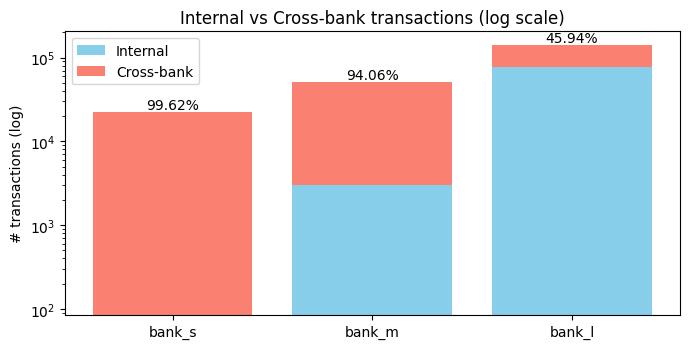

In [5]:

# -------------------------
# Figure  Internal vs Cross-bank (stacked) + annotate cross ratio
# -------------------------
fig = plt.figure(figsize=(7, 3.6))
plt.bar(banks, df["tx_internal"].values, label="Internal", color='skyblue')
plt.bar(banks, df["tx_cross"].values, bottom=df["tx_internal"].values, label="Cross-bank", color='salmon')
plt.yscale("log")
plt.ylabel("# transactions (log)")
plt.title("Internal vs Cross-bank transactions (log scale)")

# Annotate cross-bank share on top of each stacked bar
for i in range(len(banks)):
    total = df.loc[i, "tx_total"]
    ratio = df.loc[i, "cross_ratio"]
    plt.text(i, total, f"{ratio*100:.2f}%", ha="center", va="bottom", fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

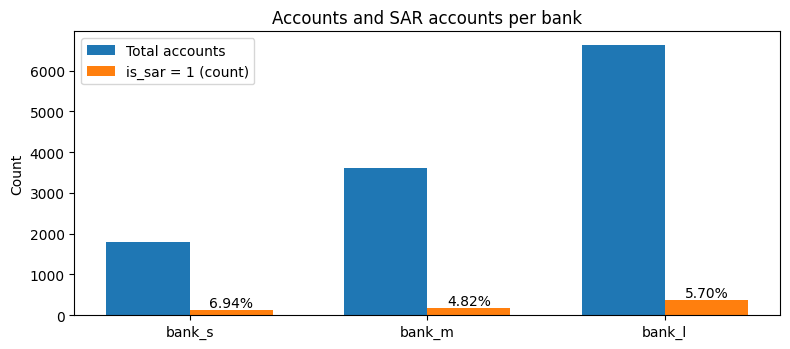

In [6]:
# -------------------------
# Figure Accounts vs SAR count (grouped) + annotate SAR rate
# -------------------------
width = 0.35
fig = plt.figure(figsize=(8, 3.6))
plt.bar(x - width/2, df["accounts"].values, width, label="Total accounts")
plt.bar(x + width/2, df["sar_yes"].values, width, label="is_sar = 1 (count)")

plt.xticks(x, banks)
plt.ylabel("Count")
plt.title("Accounts and SAR accounts per bank")

# Annotate SAR rate on top of SAR bars
for i in range(len(banks)):
    sar_cnt = df.loc[i, "sar_yes"]
    rate = df.loc[i, "sar_rate"]
    plt.text(i + width/2, sar_cnt, f"{rate*100:.2f}%", ha="center", va="bottom", fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

# Delta-only table from your Compare Summary (FL vs Baseline)
df_delta = pd.DataFrame(
    {
        "bank": ["bank_l", "bank_m", "bank_s"],
        "delta_precision": [0.128406, 0.290323, 0.065934],
        "delta_recall": [0.210526, 0.346154, 0.166667],
        "delta_ap": [0.217518, 0.411194, 0.255124],
        "delta_auc": [0.120450, 0.133050, 0.041887],
        "delta_wlogloss": [-0.163839, -0.363789, -0.446016],
        "delta_f1": [0.173414, 0.315789, 0.100791],
    }
)

# Optional: reorder columns for slide-friendly layout
df_delta = df_delta[
    ["bank", "delta_precision", "delta_recall", "delta_f1", "delta_ap", "delta_auc", "delta_wlogloss"]
]

# Format for display (rounding)
df_show = df_delta.copy()
for c in df_show.columns:
    if c != "bank":
        df_show[c] = df_show[c].map(lambda x: f"{x:+.3f}")

df_show


,bank,delta_precision,delta_recall,delta_f1,delta_ap,delta_auc,delta_wlogloss
0,bank_l,+0.128,+0.211,+0.173,+0.218,+0.120,-0.164
1,bank_m,+0.290,+0.346,+0.316,+0.411,+0.133,-0.364
2,bank_s,+0.066,+0.167,+0.101,+0.255,+0.042,-0.446


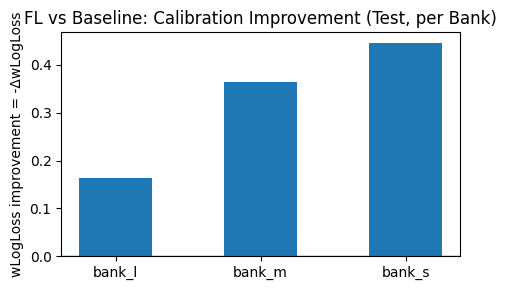

In [8]:
# All code/comments in English.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_delta = pd.DataFrame(
    {
        "bank": ["bank_l", "bank_m", "bank_s"],
        "delta_precision": [0.128406, 0.290323, 0.065934],
        "delta_recall": [0.210526, 0.346154, 0.166667],
        "delta_f1": [0.173414, 0.315789, 0.100791],
        "delta_ap": [0.217518, 0.411194, 0.255124],
        "delta_auc": [0.120450, 0.133050, 0.041887],
        "delta_wlogloss": [-0.163839, -0.363789, -0.446016],
    }
)

banks = df_delta["bank"].tolist()
x = np.arange(len(banks))

# -------------------------
# wLogLoss improvement (convert to positive improvement)
# -------------------------
# Since lower wLogLoss is better, plot -delta_wlogloss as improvement.
w_improve = (-df_delta["delta_wlogloss"]).values

plt.figure(figsize=(4.8, 3.0))
plt.bar(banks, w_improve, width=0.5)
plt.axhline(0, linewidth=1)
plt.ylabel("wLogLoss improvement = -ΔwLogLoss")
plt.title("FL vs Baseline: Calibration Improvement (Test, per Bank)")
plt.tight_layout()
plt.show()


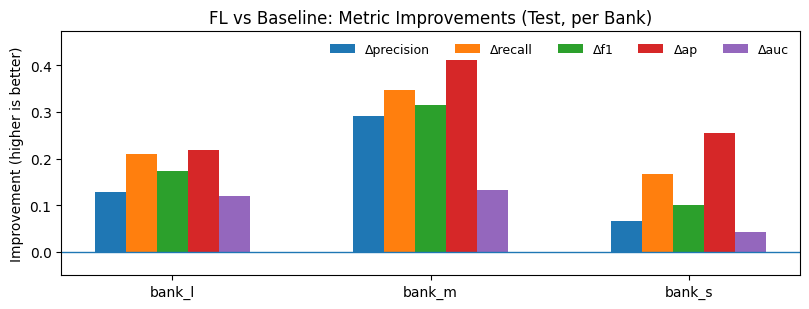

In [9]:


import numpy as np
import matplotlib.pyplot as plt

metrics_pos = ["delta_precision", "delta_recall", "delta_f1", "delta_ap", "delta_auc"]
vals = df_delta[metrics_pos].values

banks = df_delta["bank"].tolist()
x = np.arange(len(banks))

bar_w = 0.12
offsets = (np.arange(len(metrics_pos)) - (len(metrics_pos) - 1) / 2) * bar_w

plt.figure(figsize=(8.2, 3.2))
for j, m in enumerate(metrics_pos):
    plt.bar(x + offsets[j], vals[:, j], width=bar_w, label=m.replace("delta_", "Δ"))

plt.xticks(x, banks)
plt.axhline(0, linewidth=1)
plt.ylabel("Improvement (higher is better)")
plt.title("FL vs Baseline: Metric Improvements (Test, per Bank)")
plt.legend(ncol=5, fontsize=9, frameon=False)

# Add some negative space to show possibility of negative deltas
ymax = vals.max()
plt.ylim(-0.05, ymax * 1.15)

plt.tight_layout()
plt.show()


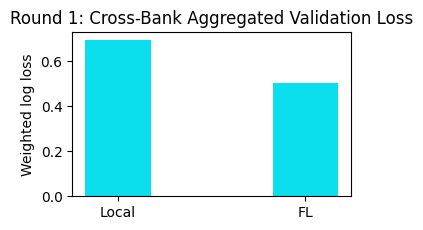

In [10]:
# use a new color scheme

labels = ["Local", "FL"]
values = [0.694693, 0.504857]

plt.figure(figsize=(3.6, 2.4))
plt.bar(labels, values, width=0.35, color=["#0bdfee"])   # thinner bars with new colors
plt.ylabel("Weighted log loss")
plt.title("Round 1: Cross-Bank Aggregated Validation Loss")
plt.tight_layout()
plt.show()



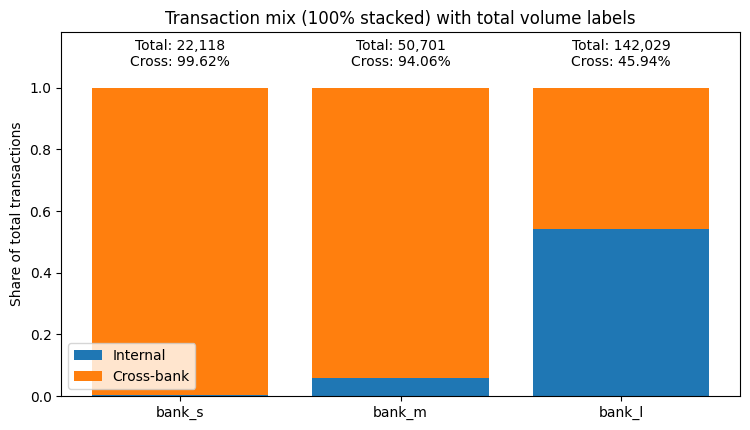

In [11]:
# Add a new figure: 100% stacked bar chart of internal vs cross-bank transaction shares, with total volume and cross-bank share annotated on top
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(
    {
        "bank": ["bank_s", "bank_m", "bank_l"],
        "tx_total": [22118, 50701, 142029],
        "tx_internal": [84, 3012, 76782],
        "tx_cross": [22034, 47689, 65247],
    }
)

df["internal_share"] = df["tx_internal"] / df["tx_total"]
df["cross_share"] = df["tx_cross"] / df["tx_total"]

banks = df["bank"].tolist()
x = np.arange(len(banks))

fig, ax = plt.subplots(figsize=(7.6, 4.4))  # slightly taller

ax.bar(x, df["internal_share"].values, label="Internal")
ax.bar(x, df["cross_share"].values, bottom=df["internal_share"].values, label="Cross-bank")

ax.set_xticks(x)
ax.set_xticklabels(banks)
ax.set_ylim(0, 1.18)  # more headroom for labels
ax.set_ylabel("Share of total transactions")
ax.set_title("Transaction mix (100% stacked) with total volume labels")

# Put labels higher, and do not clip at axes boundary
for i in range(len(banks)):
    total = df.loc[i, "tx_total"]
    cross_pct = df.loc[i, "cross_share"] * 100
    ax.text(
        i, 1.06, f"Total: {total:,}\nCross: {cross_pct:.2f}%",
        ha="center", va="bottom", fontsize=10, clip_on=False
    )

ax.legend(loc="lower left")

# Increase top margin so title + labels never collide
fig.subplots_adjust(top=0.82)

plt.tight_layout()
plt.show()
